### t-SNE plot generation

In [164]:
import pandas as pd
from sklearn.manifold import TSNE, SpectralEmbedding
import numpy as np

In [8]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [3]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')

In [5]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
vgg_X = vgg_df[features].values
vgg_y = vgg_df['accuracy_diff'].values

In [14]:
vgg_X_embedded = SpectralEmbedding(n_components=2).fit_transform(vgg_X)

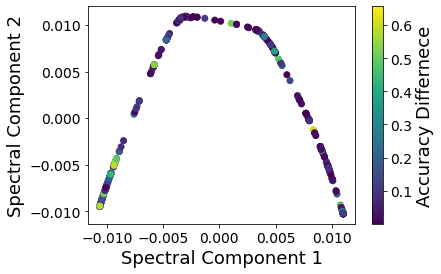

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(vgg_X_embedded[:, 0],vgg_X_embedded[:, 1] , c= vgg_y, cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Differnece")
ax.set_xlabel('Spectral Component 1')
ax.set_ylabel('Spectral Component 2')
plt.savefig('vgg_spectral_params.png', bbox_inches="tight", dpi=200)

In [154]:
total_max = np.max([np.max(vgg_mi), np.max(dense_mi), np.max(resnet_mi)])

In [63]:
from sklearn.feature_selection import mutual_info_regression

In [167]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
vgg_X = vgg_df[features].values
vgg_y = vgg_df['accuracy_diff'].values
vgg_mi = mutual_info_regression(vgg_X, vgg_y)
vgg_mi /= np.max(vgg_mi)
# vgg_mi /= total_max
vgg_mi

array([0.        , 0.77806718, 0.26450324, 1.        ])

In [156]:
resnet_df = pd.read_csv('../wandb_results/resnet_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
resnet_X = resnet_df[features].values
resnet_y = resnet_df['accuracy_diff'].values
resnet_mi = mutual_info_regression(resnet_X, resnet_y)
resnet_mi /= np.max(resnet_mi)
# resnet_mi /= total_max
resnet_mi

array([0.17314716, 0.09566679, 0.02454754, 0.07521252])

In [ ]:
dense_df = pd.read_csv('../wandb_results/densenet_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
dense_X = dense_df[features].values
dense_y = dense_df['accuracy_diff'].values
dense_mi = mutual_info_regression(dense_X, dense_y)
# dense_mi /= total_max
dense_mi /= np.max(dense_mi)
dense_mi

In [76]:
sum(vgg_mi)

0.4233758664811904

In [158]:
mi_df = pd.DataFrame(columns=['Compared Stat', 'MI', 'Model'])

In [159]:
mi_df

,Compared Stat,MI,Model


In [160]:
features_plot = ["Epochs", "Batch Size", "Learning Rate", "Adam Epsilon"]

In [161]:
for i in range(4):
    mi_df = mi_df.append({'MI':vgg_mi[i], 'Compared Stat': features_plot[i], 'Model':'VGG'}, ignore_index=True)
    mi_df = mi_df.append({'MI':resnet_mi[i], 'Compared Stat': features_plot[i], 'Model':'ResNet'}, ignore_index=True)
    mi_df = mi_df.append({'MI':dense_mi[i], 'Compared Stat': features_plot[i], 'Model':'DenseNet'}, ignore_index=True)

In [162]:
mi_df

,Compared Stat,MI,Model
0,Epochs,0.137070,VGG
1,Epochs,0.173147,ResNet
2,Epochs,1.008674,DenseNet
3,Batch Size,0.198587,VGG
4,Batch Size,0.095667,ResNet
5,Batch Size,0.305942,DenseNet
6,Learning Rate,0.149509,VGG
7,Learning Rate,0.024548,ResNet
8,Learning Rate,0.103117,DenseNet
9,Adam Epsilon,0.312978,VGG


In [133]:
import seaborn as sns

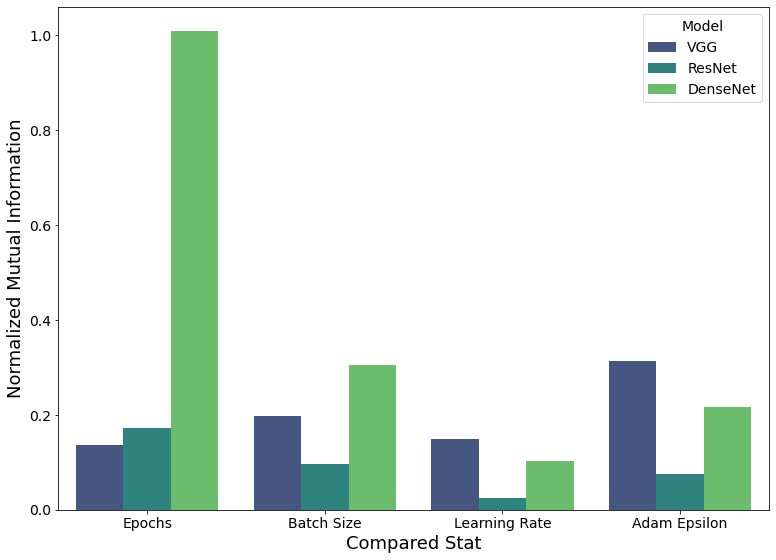

In [163]:
ax = sns.barplot(x="Compared Stat", y="MI", hue="Model", data=mi_df, palette="viridis")
plt.ylabel("Normalized Mutual Information")
fig = plt.gcf()
fig.set_size_inches(11, 8)
plt.tight_layout()
plt.savefig('totalmax_normalized_mutual_info_sklearn.jpeg', dpi=200)